# 1. Image Negative

In [92]:
from PIL import Image
import numpy as np

image = Image.open("images/image.jpeg")

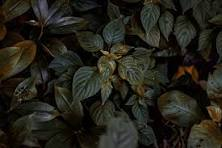

In [93]:
image

In [94]:
pixels = list(image.getdata())

In [95]:
pixels[:10]

[(3, 0, 9),
 (7, 1, 11),
 (20, 15, 21),
 (21, 17, 16),
 (9, 4, 0),
 (14, 10, 0),
 (33, 30, 11),
 (41, 39, 16),
 (51, 47, 22),
 (45, 41, 14)]

In [96]:
negative_pixels = [(255 - pixel[0], 255 - pixel[1], 255 - pixel[2]) for pixel in pixels]

In [97]:
negative_pixels[:10]

[(252, 255, 246),
 (248, 254, 244),
 (235, 240, 234),
 (234, 238, 239),
 (246, 251, 255),
 (241, 245, 255),
 (222, 225, 244),
 (214, 216, 239),
 (204, 208, 233),
 (210, 214, 241)]

In [98]:
negative_image = Image.new(image.mode, image.size)
negative_image.putdata(negative_pixels)

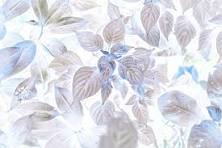

In [99]:
negative_image

In [100]:
negative_image.save("negative_image.jpg")

# 2. Gama Encoding/Correction

In [101]:
image2 = Image.open("images/image.jpeg")

In [102]:
if image2.mode == "RGB":
    image2 = image2.convert("L")

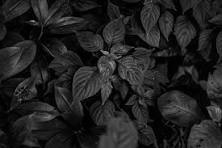

In [103]:
image2

Gamma correction or gamma is a nonlinear operation used to encode and decode luminance or tristimulus values in video or still image systems. Gamma correction is, in the simplest cases, defined by the following power-law expression:

Corrected Intensity = Original Intensity^γ

In the common case inputs and outputs are typically in the range 0–1.

A gamma value γ < 1 is sometimes called an encoding gamma, and the process of encoding with this compressive power-law nonlinearity is called gamma compression; conversely, a gamma value γ > 1 is called a decoding gamma, and the application of the expansive power-law nonlinearity is called gamma expansion.

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Gamma_correction)

In [104]:
def gamma_correction(image, gamma):
    image_array = np.array(image)

    corrected_image_array = np.power(image_array / 255.0, gamma) * 255.0

    corrected_image_array = corrected_image_array.astype(np.uint8)

    return Image.fromarray(corrected_image_array)

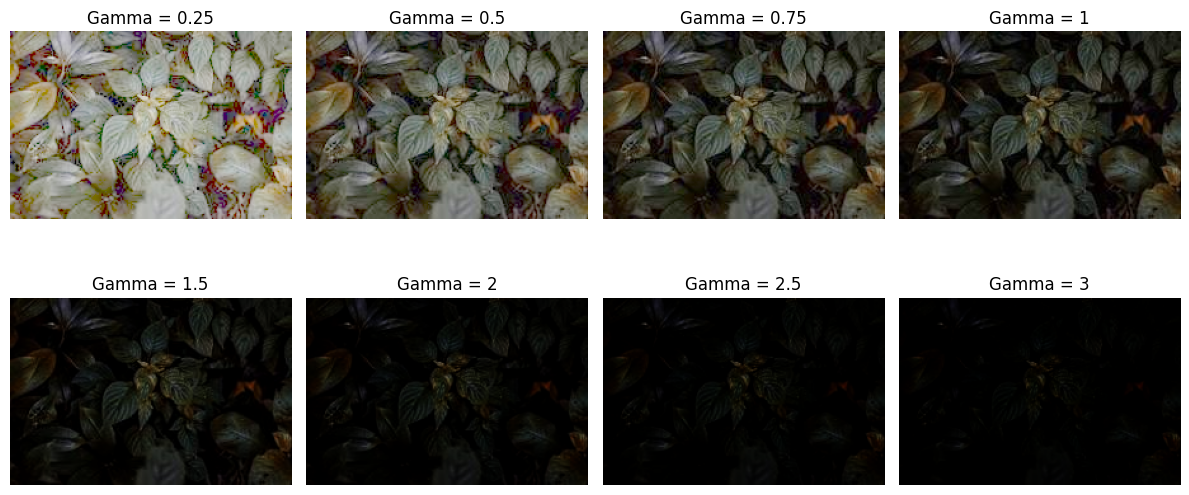

In [105]:
import numpy as np
import matplotlib.pyplot as plt

gamma_values = [0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]
fig, axs = plt.subplots(2, 4, figsize=(12, 6))  # Adjust the figsize as needed

for i, gamma in enumerate(gamma_values):
    corrected_image = gamma_correction(image, gamma)  # Assuming gamma_correction() returns a PIL Image
    corrected_array = np.array(corrected_image)  # Convert PIL Image to NumPy array
    ax = axs[i // 4, i % 4]
    ax.imshow(corrected_array, extent=[0, corrected_array.shape[1], 0, corrected_array.shape[0]])
    ax.set_title(f"Gamma = {gamma}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Logarithmic

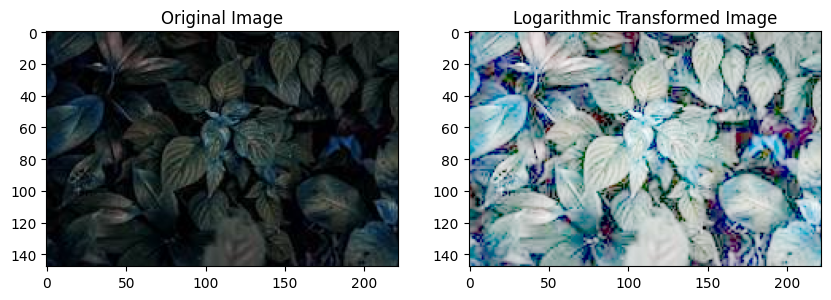

In [106]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/image.jpeg')

c = 255 / np.log(1 + np.max(img))
log_transformed = c * (np.log(img + 1))

log_transformed = np.uint8(log_transformed)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Logarithmic Transformed Image')

plt.show()


# 4. Contrast Stretching

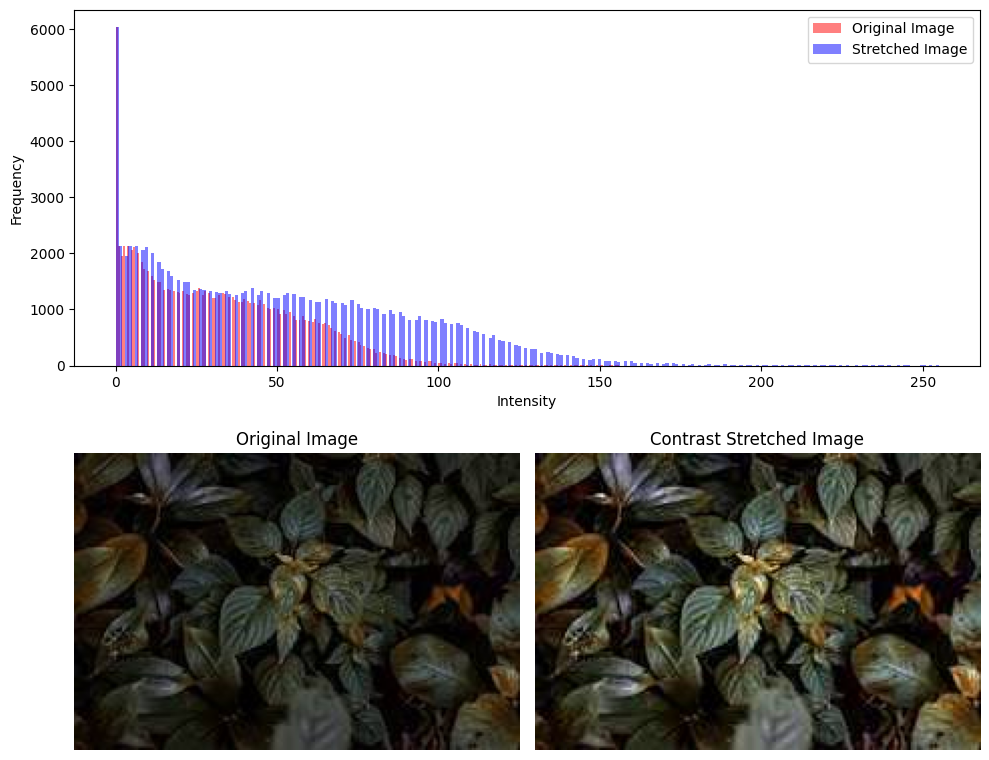

In [107]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/image.jpeg')

img_float = img.astype(np.float32)

min_intensity = np.min(img_float)
max_intensity = np.max(img_float)

stretched = 255 * ((img_float - min_intensity) / (max_intensity - min_intensity))

stretched = np.uint8(stretched)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.hist(img.ravel(), bins=256, color='r', alpha=0.5, label='Original Image')
plt.hist(stretched.ravel(), bins=256, color='b', alpha=0.5, label='Stretched Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(stretched, cv2.COLOR_BGR2RGB))
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.tight_layout()
plt.show()

#  5. Histogram Equalization

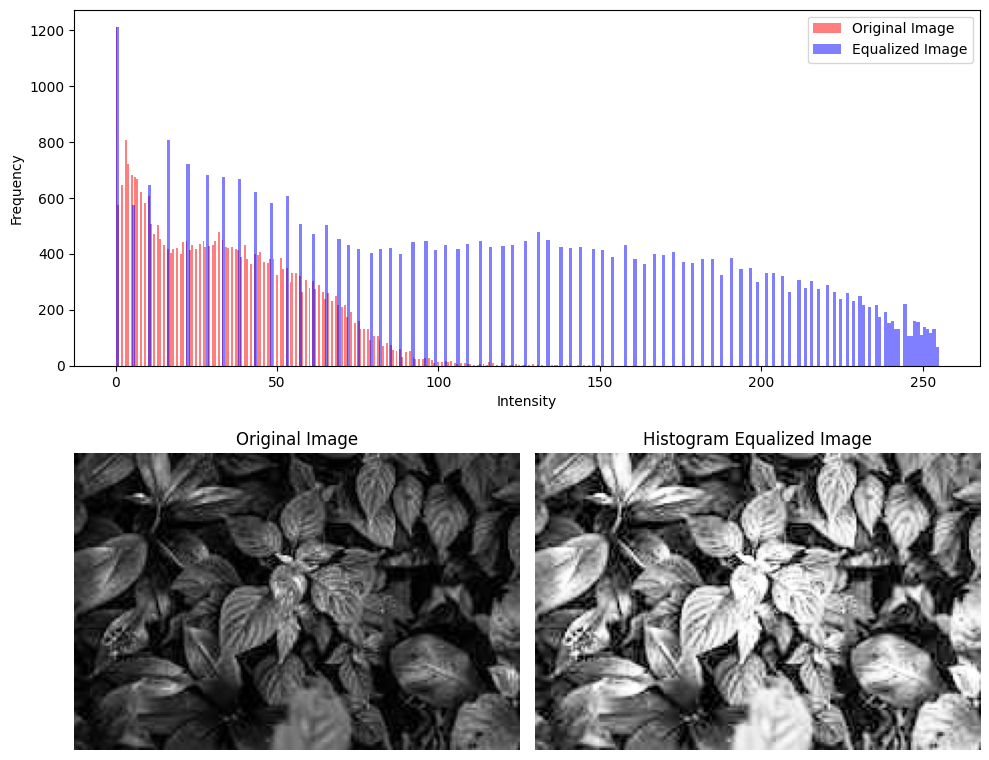

In [108]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/image.jpeg', 0)

equalized = cv2.equalizeHist(img)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.hist(img.ravel(), bins=256, color='r', alpha=0.5, label='Original Image')
plt.hist(equalized.ravel(), bins=256, color='b', alpha=0.5, label='Equalized Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# 6. Intensity Level Slicing

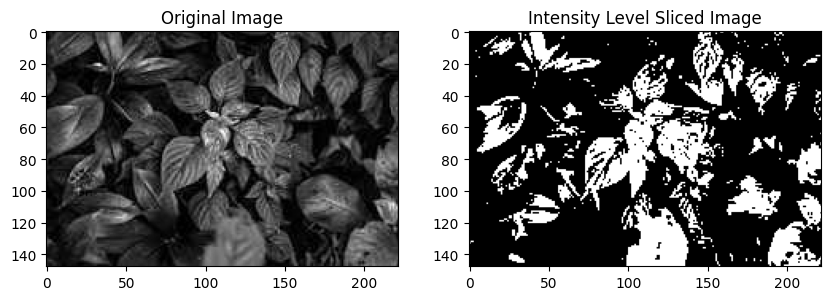

In [111]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def intensity_level_slicing(img, low, high, fill_value):
    mask = cv2.inRange(img, low, high)

    result = img.copy()
    result[mask != 0] = fill_value
    result[mask == 0] = 0

    return result

img = cv2.imread('images/image.jpeg', cv2.IMREAD_GRAYSCALE)

low_intensity = 50
high_intensity = 150
fill_value = 255

sliced_img = intensity_level_slicing(img, low_intensity, high_intensity, fill_value)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sliced_img, cmap='gray')
plt.title('Intensity Level Sliced Image')

plt.show()

# 7. Bit Plane Slicing

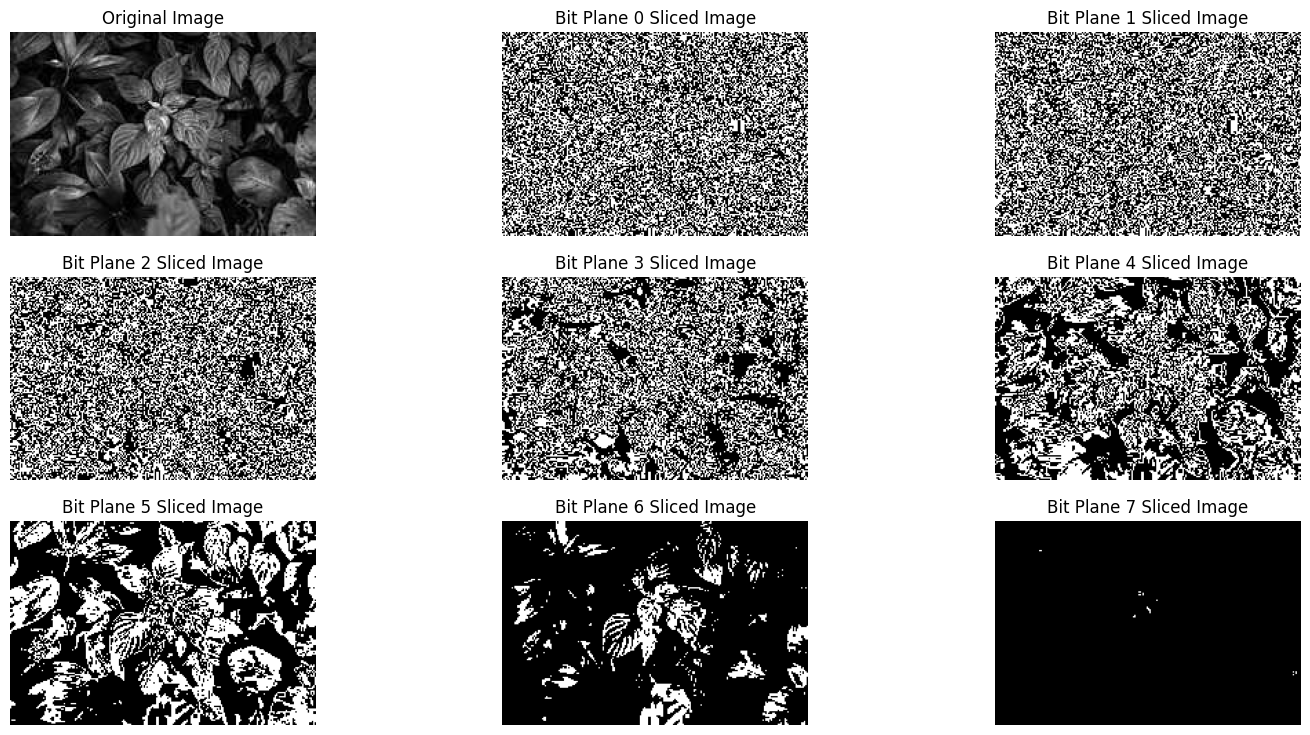

In [110]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def bit_plane_slice(img, plane):
    return (img >> plane) & 1

img = cv2.imread('images/image.jpeg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(18, 9))

plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i in range(8):
    bit_plane = i
    sliced_img = bit_plane_slice(img, bit_plane)
    plt.subplot(3, 3, i+2)
    plt.imshow(sliced_img, cmap='gray')
    plt.title(f'Bit Plane {bit_plane} Sliced Image')
    plt.axis('off')

plt.show()